# Revenue Prediction - Model

In [1]:
import numpy as np
import pandas as pd 


In [2]:
df = pd.read_csv('Data.csv')
df.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Education,...,Country,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,189,104,379,111,189,218,4,4,6,Graduation,...,SP,0,0,0,0,0,0,0,1,0
1,464,5,64,7,0,37,7,3,7,Graduation,...,CA,0,0,0,0,0,0,1,1,0
2,134,11,59,15,2,30,3,2,5,Graduation,...,US,0,1,0,0,0,0,0,0,0
3,10,0,1,0,0,0,1,0,2,Graduation,...,AUS,1,1,0,0,0,0,0,0,0
4,6,16,24,11,0,34,3,1,2,Graduation,...,SP,1,0,1,0,0,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   MntWines             2240 non-null   int64 
 1   MntFruits            2240 non-null   int64 
 2   MntMeatProducts      2240 non-null   int64 
 3   MntFishProducts      2240 non-null   int64 
 4   MntSweetProducts     2240 non-null   int64 
 5   MntGoldProds         2240 non-null   int64 
 6   NumWebPurchases      2240 non-null   int64 
 7   NumCatalogPurchases  2240 non-null   int64 
 8   NumStorePurchases    2240 non-null   int64 
 9   Education            2240 non-null   object
 10  Marital_Status       2240 non-null   object
 11  Country              2240 non-null   object
 12  Kidhome              2240 non-null   int64 
 13  Teenhome             2240 non-null   int64 
 14  AcceptedCmp3         2240 non-null   int64 
 15  AcceptedCmp4         2240 non-null   int64 
 16  Accept

In [4]:
cat_cols = [ 'Education',
 'Marital_Status',
 'Country',
 'Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain']

for i in cat_cols:
    df[i] = df[i].astype('category')

In [5]:
from pycaret.regression import *

X = df.drop(['MntWines'], axis=1)

exp1 = setup(data=df, target='MntWines', 
             pca=True, pca_components=0.95,
             session_id = 123,
             normalize = True, 
             normalize_method = 'robust', 
             transform_target = True,
             categorical_features=cat_cols,
             data_split_shuffle = True,)


,Description,Value
0,Session id,123
1,Target,MntWines
2,Target type,Regression
3,Original data shape,"(2240, 21)"
4,Transformed data shape,"(2240, 20)"
5,Transformed train set shape,"(1568, 20)"
6,Transformed test set shape,"(672, 20)"
7,Ordinal features,7
8,Numeric features,8
9,Categorical features,12


In [6]:
compare_models(include=['lr', 'svm', 'dt'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)


SVR()

In [7]:
best = compare_models() 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,103.1909,34997.4258,185.0949,0.6910,0.6154,0.7176,2.4410
et,Extra Trees Regressor,106.3182,36185.5969,188.6703,0.6804,0.6448,0.7512,0.2350
lightgbm,Light Gradient Boosting Machine,106.9253,36511.7605,189.5018,0.6750,0.6356,0.7846,0.1840
xgboost,Extreme Gradient Boosting,110.1500,37808.6190,192.9935,0.6642,0.6639,0.7788,0.2310
gbr,Gradient Boosting Regressor,112.6838,37969.3360,193.2984,0.6641,0.6723,0.8410,0.4400
rf,Random Forest Regressor,113.0018,38642.3670,195.1936,0.6579,0.6782,0.8774,0.6350
knn,K Neighbors Regressor,125.0737,44989.6942,211.0570,0.6006,0.8013,0.9920,0.0960
ada,AdaBoost Regressor,132.3578,48656.1709,218.8861,0.5715,0.7857,1.0790,0.1540
br,Bayesian Ridge,141.2764,64478.5590,252.8136,0.4220,0.7998,2.3617,0.0840
ridge,Ridge Regression,141.6495,64806.3924,253.4480,0.4190,0.7989,2.3463,0.0950


In [8]:
lr_model = create_model('lr')
svm_model = create_model('svm')
dt_model = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,164.2872,82553.8779,287.3219,0.3778,0.7937,2.1064
1,137.0452,52996.4870,230.2097,0.5080,0.7693,1.0808
2,155.0608,82440.6450,287.1248,0.3212,0.8941,6.1955
3,133.2692,53271.6383,230.8065,0.3523,0.7518,0.9766
4,144.7821,72059.3605,268.4387,0.3175,0.7227,0.9750
5,127.1005,46642.4346,215.9686,0.5867,0.7247,0.8891
6,143.2302,71714.6859,267.7960,0.3804,0.8729,1.3635
7,149.1412,63998.5323,252.9793,0.5091,0.7560,0.7765
8,136.5027,69432.4499,263.5004,0.4063,0.8153,1.4987


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,115.9996,46600.5413,215.8716,0.6488,0.6481,0.9413
1,101.5366,35755.3713,189.0909,0.6680,0.5570,0.5918
2,103.9823,37003.0775,192.3618,0.6953,0.7213,2.1072
3,90.9231,23526.4305,153.3833,0.7139,0.5320,0.5436
4,101.5335,32701.3330,180.8351,0.6903,0.5713,0.6588
5,101.0350,34464.3048,185.6456,0.6946,0.5486,0.5321
6,114.9519,53504.5315,231.3105,0.5377,0.6717,0.8253
7,103.8111,33658.3709,183.4622,0.7418,0.5939,0.6286
8,100.1566,34242.4524,185.0472,0.7072,0.6405,0.7535


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,159.9554,71024.2611,266.5038,0.4647,0.8819,0.8250
1,163.2930,68153.5350,261.0623,0.3673,1.0609,1.1354
2,145.0510,60656.4522,246.2853,0.5005,1.0223,1.4722
3,156.4395,63846.8726,252.6794,0.2237,0.9220,1.0791
4,173.1911,87173.9045,295.2523,0.1743,1.1007,1.5698
5,157.5287,70638.9554,265.7799,0.3740,0.9485,0.8492
6,150.4076,72063.7707,268.4470,0.3774,0.9174,1.2866
7,149.1146,71264.7197,266.9545,0.4534,0.9625,1.0749
8,161.8013,77116.6859,277.6989,0.3406,0.9956,2.0414


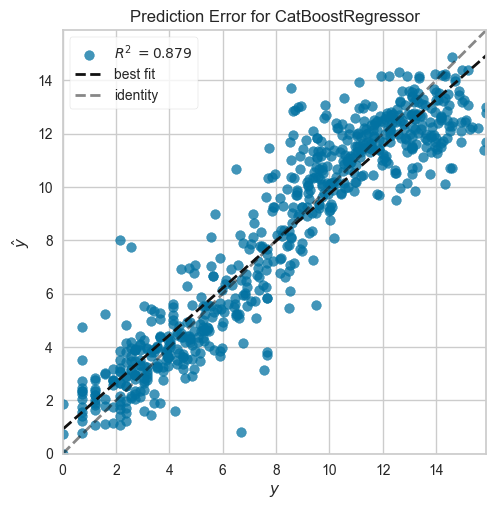

In [9]:
plot_model(best, plot= 'error')

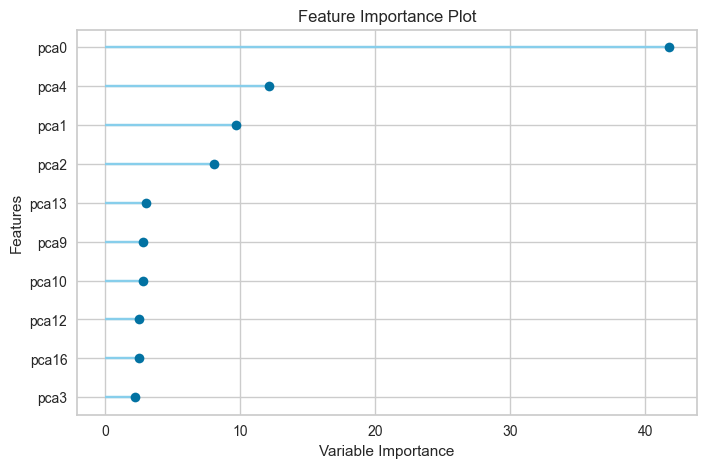

In [10]:
plot_model(best, plot = 'feature')

In [11]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

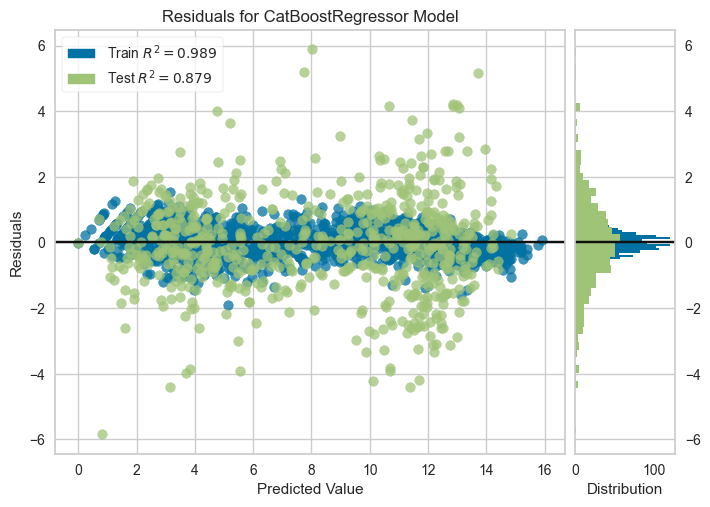

In [12]:
plot_model(best, plot = 'residuals')

In [37]:
predict_model(best,data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,50.7287,12864.0382,113.4197,0.8864,0.3850,0.3303


,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Education,Marital_Status,...,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,MntWines,prediction_label
0,104,379,111,189,218,4,4,6,Graduation,Divorced,...,0,0,0,0,0,0,1,0,189,429.797735
1,5,64,7,0,37,7,3,7,Graduation,Single,...,0,0,0,0,0,1,1,0,464,487.075978
2,11,59,15,2,30,3,2,5,Graduation,Married,...,1,0,0,0,0,0,0,0,134,144.605153
3,0,1,0,0,0,1,0,2,Graduation,Together,...,1,0,0,0,0,0,0,0,10,9.948284
4,16,24,11,0,34,3,1,2,Graduation,Single,...,0,1,0,0,0,0,1,0,6,6.681615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,18,126,47,48,78,5,2,11,PhD,Divorced,...,1,0,0,0,0,0,0,0,372,443.992574
2236,10,13,3,8,16,1,0,3,2n Cycle,Married,...,0,0,0,0,0,0,0,0,5,1.666412
2237,2,88,15,5,14,6,1,5,Graduation,Divorced,...,0,0,0,0,0,0,0,0,185,108.916518
2238,38,701,149,165,63,5,4,10,Graduation,Married,...,0,0,0,0,0,0,0,0,267,452.199358


## Tuning the Model 

In [14]:
best_tuned = tune_model(best)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:38:32
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,141.9398,60543.5529,246.0560,0.5437,0.7143,1.0238
1,104.3605,30450.5771,174.5009,0.7173,0.6096,0.7923
2,99.4707,31929.0630,178.6871,0.7371,0.6317,0.7614
3,99.5961,26059.9440,161.4309,0.6831,0.6255,0.7174
4,110.5588,36723.5363,191.6339,0.6522,0.6662,0.8176
5,107.5217,38242.8138,195.5577,0.6611,0.5924,0.5435
6,123.0710,51352.1742,226.6102,0.5563,0.6766,0.7890
7,119.0310,42496.2758,206.1462,0.6741,0.6237,0.6545
8,113.6782,39207.9244,198.0099,0.6647,0.6612,0.7436


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


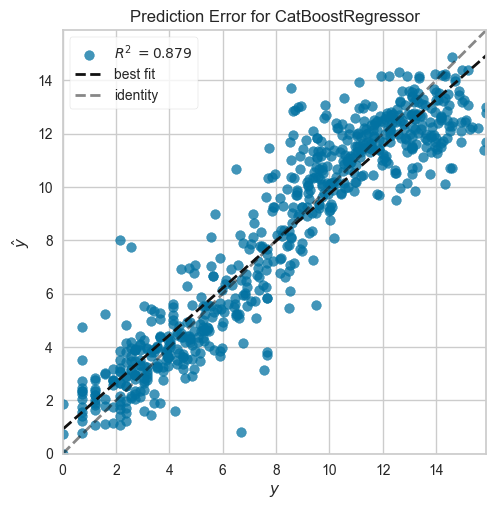

In [15]:
plot_model(best, plot = 'error')

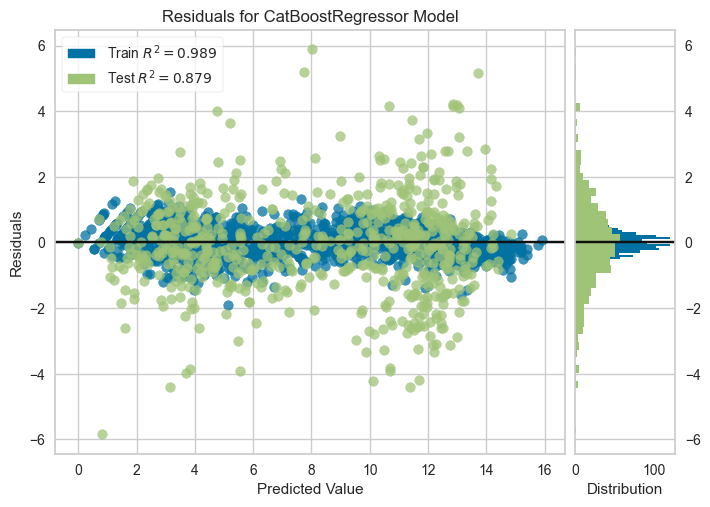

In [36]:
plot_model(best_tuned, plot = 'residuals')

- after tuning we can see some improvements 
- The model is capturing a reasonable amount of variability and can be considered acceptable.

In [38]:
predict_model(best_tuned,data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,50.7287,12864.0382,113.4197,0.8864,0.3850,0.3303


,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Education,Marital_Status,...,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,MntWines,prediction_label
0,104,379,111,189,218,4,4,6,Graduation,Divorced,...,0,0,0,0,0,0,1,0,189,429.797735
1,5,64,7,0,37,7,3,7,Graduation,Single,...,0,0,0,0,0,1,1,0,464,487.075978
2,11,59,15,2,30,3,2,5,Graduation,Married,...,1,0,0,0,0,0,0,0,134,144.605153
3,0,1,0,0,0,1,0,2,Graduation,Together,...,1,0,0,0,0,0,0,0,10,9.948284
4,16,24,11,0,34,3,1,2,Graduation,Single,...,0,1,0,0,0,0,1,0,6,6.681615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,18,126,47,48,78,5,2,11,PhD,Divorced,...,1,0,0,0,0,0,0,0,372,443.992574
2236,10,13,3,8,16,1,0,3,2n Cycle,Married,...,0,0,0,0,0,0,0,0,5,1.666412
2237,2,88,15,5,14,6,1,5,Graduation,Divorced,...,0,0,0,0,0,0,0,0,185,108.916518
2238,38,701,149,165,63,5,4,10,Graduation,Married,...,0,0,0,0,0,0,0,0,267,452.199358


## Blending top Models

In [17]:
blend01 = blend_models(estimator_list = [lr_model,dt_model,svm_model])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,127.6645,49736.7858,223.0175,0.6251,0.6615,0.8645
1,120.2163,41736.1695,204.2943,0.6125,0.6782,0.7737
2,114.5084,43497.5618,208.5607,0.6418,0.7692,2.3010
3,98.6398,25254.6028,158.9170,0.6929,0.6129,0.6798
4,115.1888,40886.8704,202.2050,0.6127,0.6917,0.8633
5,109.0357,39912.5336,199.7812,0.6463,0.6263,0.6270
6,122.6176,55350.8917,235.2677,0.5218,0.7330,0.9407
7,109.8259,37455.6560,193.5346,0.7127,0.6574,0.6621
8,109.7593,40901.4482,202.2411,0.6503,0.7079,0.9658


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

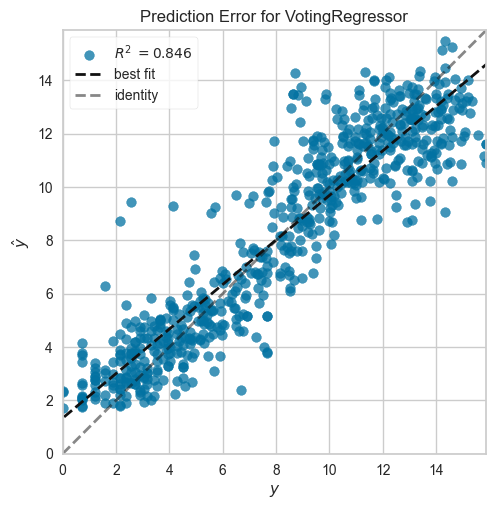

In [18]:
plot_model(blend01, plot = 'error')

In [39]:
predict_model(blend01,data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,84.0861,25771.1988,160.5341,0.7724,0.5320,0.6426


,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Education,Marital_Status,...,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,MntWines,prediction_label
0,104,379,111,189,218,4,4,6,Graduation,Divorced,...,0,0,0,0,0,0,1,0,189,471.177094
1,5,64,7,0,37,7,3,7,Graduation,Single,...,0,0,0,0,0,1,1,0,464,406.088835
2,11,59,15,2,30,3,2,5,Graduation,Married,...,1,0,0,0,0,0,0,0,134,114.487880
3,0,1,0,0,0,1,0,2,Graduation,Together,...,1,0,0,0,0,0,0,0,10,11.046457
4,16,24,11,0,34,3,1,2,Graduation,Single,...,0,1,0,0,0,0,1,0,6,15.216241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,18,126,47,48,78,5,2,11,PhD,Divorced,...,1,0,0,0,0,0,0,0,372,616.652545
2236,10,13,3,8,16,1,0,3,2n Cycle,Married,...,0,0,0,0,0,0,0,0,5,3.839451
2237,2,88,15,5,14,6,1,5,Graduation,Divorced,...,0,0,0,0,0,0,0,0,185,109.357629
2238,38,701,149,165,63,5,4,10,Graduation,Married,...,0,0,0,0,0,0,0,0,267,359.222405


In [19]:
blend02 = blend_models(estimator_list=[best_tuned,blend01])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,122.3579,47500.5500,217.9462,0.6420,0.6446,0.8738
1,106.6400,34150.9151,184.7997,0.6829,0.6005,0.6708
2,105.6574,38464.5474,196.1238,0.6833,0.6844,1.4315
3,90.3656,21874.9492,147.9018,0.7340,0.5628,0.5966
4,102.5282,33508.5663,183.0535,0.6826,0.6404,0.7713
5,104.7353,37825.5448,194.4879,0.6648,0.5751,0.5462
6,117.4929,52505.9589,229.1418,0.5464,0.6775,0.8275
7,104.9093,35099.5621,187.3488,0.7308,0.5965,0.5867
8,99.0287,33394.2656,182.7410,0.7145,0.6396,0.7525


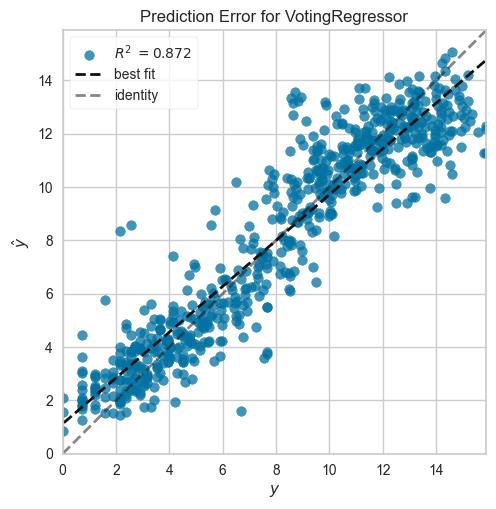

In [20]:
plot_model(blend02, plot = 'error')

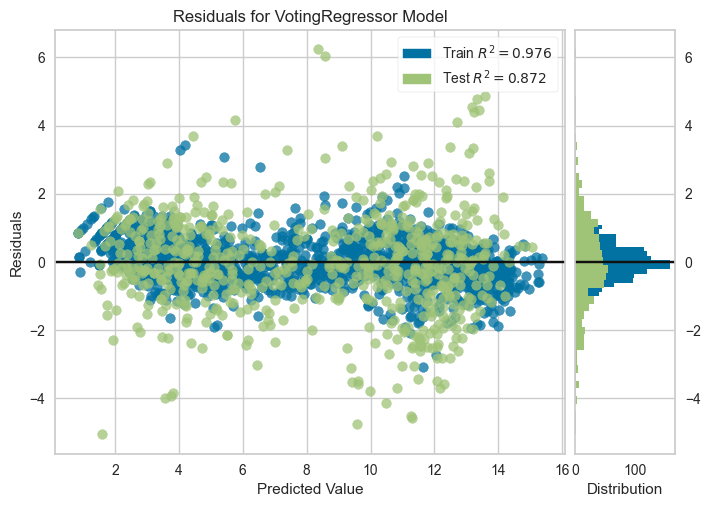

In [21]:
plot_model(blend02, plot = 'residuals')

In [40]:
predict_model(blend02,data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,64.5097,17266.2560,131.4011,0.8475,0.4353,0.4299


,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Education,Marital_Status,...,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,MntWines,prediction_label
0,104,379,111,189,218,4,4,6,Graduation,Divorced,...,0,0,0,0,0,0,1,0,189,450.103487
1,5,64,7,0,37,7,3,7,Graduation,Single,...,0,0,0,0,0,1,1,0,464,445.096553
2,11,59,15,2,30,3,2,5,Graduation,Married,...,1,0,0,0,0,0,0,0,134,128.841068
3,0,1,0,0,0,1,0,2,Graduation,Together,...,1,0,0,0,0,0,0,0,10,10.486751
4,16,24,11,0,34,3,1,2,Graduation,Single,...,0,1,0,0,0,0,1,0,6,10.310248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,18,126,47,48,78,5,2,11,PhD,Divorced,...,1,0,0,0,0,0,0,0,372,524.606129
2236,10,13,3,8,16,1,0,3,2n Cycle,Married,...,0,0,0,0,0,0,0,0,5,2.622725
2237,2,88,15,5,14,6,1,5,Graduation,Divorced,...,0,0,0,0,0,0,0,0,185,109.136895
2238,38,701,149,165,63,5,4,10,Graduation,Married,...,0,0,0,0,0,0,0,0,267,403.552954


In [24]:
top_models_lst = ['et','lightgbm','xgboost','gbr','rf']
top_models = [best_tuned]
for i in top_models_lst:
    top_models.append(create_model(i))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,129.1523,52687.7406,229.5381,0.6029,0.6993,0.8457
1,98.3977,32444.4454,180.1234,0.6988,0.6124,0.7674
2,105.5158,38604.4921,196.4803,0.6821,0.6776,0.9025
3,90.1581,23828.2981,154.3642,0.7103,0.5865,0.6186
4,110.7324,34563.0486,185.9114,0.6726,0.7101,0.9261
5,109.3434,38254.7916,195.5883,0.6610,0.6190,0.5492
6,116.6748,45181.7073,212.5599,0.6096,0.6751,0.8166
7,111.3433,37957.7827,194.8276,0.7089,0.6156,0.6179
8,111.8181,38232.3964,195.5311,0.6731,0.6524,0.7752


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,123.4127,47450.0387,217.8303,0.6424,0.6625,0.8319
1,100.8895,30608.4043,174.9526,0.7158,0.6105,0.7459
2,109.2713,40119.5282,200.2986,0.6697,0.6768,1.1054
3,95.9759,25230.1357,158.8400,0.6932,0.5965,0.6594
4,110.1093,37997.9024,194.9305,0.6401,0.6727,0.8448
5,113.3104,40073.2355,200.1830,0.6449,0.5858,0.5171
6,125.7879,55991.4558,236.6251,0.5163,0.6747,0.8533
7,102.1987,31255.4443,176.7921,0.7603,0.5851,0.6094
8,105.0433,33068.0110,181.8461,0.7172,0.6577,0.8214


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,124.3142,45389.5777,213.0483,0.6579,0.6920,0.9065
1,106.6914,34353.3837,185.3467,0.6811,0.6594,0.9046
2,116.3078,43449.3375,208.4450,0.6422,0.6758,0.7358
3,99.0247,27056.3089,164.4880,0.6710,0.6165,0.6267
4,112.1243,39584.5062,198.9586,0.6251,0.7124,0.8946
5,116.8436,42237.5754,205.5178,0.6257,0.6277,0.5707
6,118.2969,51566.7336,227.0831,0.5545,0.6963,0.8288
7,115.4530,40463.9723,201.1566,0.6896,0.6507,0.7019
8,112.6238,33837.5097,183.9497,0.7107,0.6926,0.9816


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,132.9966,52513.7920,229.1589,0.6042,0.7113,0.8878
1,111.1286,35767.8959,189.1240,0.6679,0.6903,1.1068
2,119.0819,43110.7192,207.6312,0.6450,0.6892,1.0794
3,92.0435,23317.9504,152.7022,0.7165,0.6379,0.6698
4,113.1648,34646.3489,186.1353,0.6718,0.7344,0.9862
5,116.1316,39426.2794,198.5605,0.6506,0.6337,0.5849
6,127.0138,53355.0144,230.9870,0.5390,0.7308,0.9220
7,116.4173,37688.0760,194.1342,0.7109,0.6285,0.6427
8,111.1405,35433.5464,188.2380,0.6970,0.6495,0.7450


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,134.8576,53407.1846,231.0999,0.5975,0.7129,0.9573
1,104.4622,33546.1572,183.1561,0.6886,0.6709,0.9584
2,110.7118,38504.8452,196.2265,0.6829,0.6832,1.1173
3,96.7232,25700.0803,160.3124,0.6875,0.6349,0.7018
4,118.1129,38676.2502,196.6628,0.6337,0.7448,1.0018
5,113.6173,38763.2179,196.8838,0.6565,0.6387,0.6019
6,125.7109,49927.3549,223.4443,0.5686,0.6977,0.8777
7,119.9848,42579.2963,206.3475,0.6734,0.6475,0.6852
8,121.5787,41809.3932,204.4735,0.6425,0.7050,0.9677


In [25]:
blend03 = blend_models(estimator_list=top_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,125.5682,48226.4605,219.6052,0.6365,0.6710,0.8638
1,99.6430,31021.0012,176.1278,0.7120,0.6126,0.7989
2,108.0985,38250.6675,195.5778,0.6850,0.6504,0.9249
3,88.0174,22410.3035,149.7007,0.7275,0.5825,0.6085
4,106.8713,33970.1767,184.3100,0.6782,0.6774,0.8580
5,109.1112,37501.1399,193.6521,0.6677,0.5818,0.5256
6,116.4496,48291.8107,219.7540,0.5828,0.6655,0.8095
7,107.7111,35518.6236,188.4639,0.7276,0.5936,0.6037
8,106.7432,33641.9122,183.4173,0.7123,0.6358,0.7671


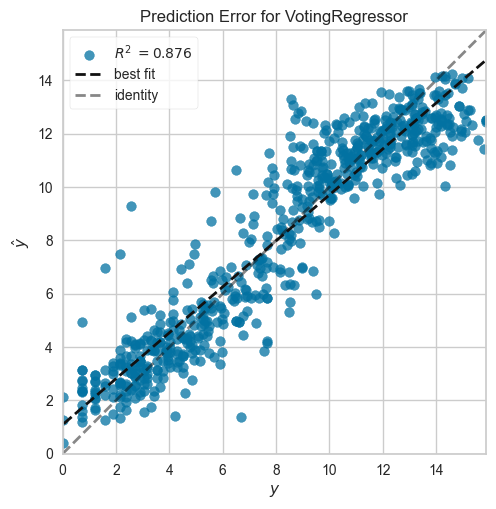

In [26]:
plot_model(blend03, plot = 'error')

In [35]:
predict_model(blend03,data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,52.6743,13114.9073,114.5203,0.8842,0.3840,0.3452


,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Education,Marital_Status,...,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,MntWines,prediction_label
0,104,379,111,189,218,4,4,6,Graduation,Divorced,...,0,0,0,0,0,0,1,0,189,435.517914
1,5,64,7,0,37,7,3,7,Graduation,Single,...,0,0,0,0,0,1,1,0,464,451.795505
2,11,59,15,2,30,3,2,5,Graduation,Married,...,1,0,0,0,0,0,0,0,134,135.554224
3,0,1,0,0,0,1,0,2,Graduation,Together,...,1,0,0,0,0,0,0,0,10,10.597496
4,16,24,11,0,34,3,1,2,Graduation,Single,...,0,1,0,0,0,0,1,0,6,7.741160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,18,126,47,48,78,5,2,11,PhD,Divorced,...,1,0,0,0,0,0,0,0,372,475.128940
2236,10,13,3,8,16,1,0,3,2n Cycle,Married,...,0,0,0,0,0,0,0,0,5,2.292808
2237,2,88,15,5,14,6,1,5,Graduation,Divorced,...,0,0,0,0,0,0,0,0,185,84.370413
2238,38,701,149,165,63,5,4,10,Graduation,Married,...,0,0,0,0,0,0,0,0,267,474.422677


- R2 ~ 0.88
- The model is capturing a reasonable amount of variability and  could be considered acceptable in this cases.
- Blending has not improved the model any further 